In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functools import partial
from IPython.display import Image
from matplotlib import animation

from collision_functions import *

Set up the physical and animation parameters along with the initial positions and velocities.

In [2]:
# Physical parameters in SI units
radius = 0.0015
mass = 2.672e-26
initial_speed = 500.  # replace with an array of random values from any distribution
delta_time = 3e-5

# Animation parameters
particles = 400
maxes = 1, 1  # xmax, ymax

# Set up the particles
position = np.random.default_rng().random((particles, 2))
velocity = np.column_stack((np.where(position[:, 0] <= 0.5, initial_speed, -initial_speed), np.zeros(position.shape[0])))
colors = np.where(position[:, 0] <= 0.5, 'r', 'b')

Set up the initial figure and color the points.

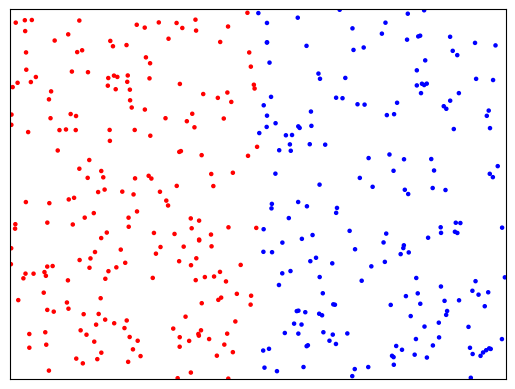

In [3]:
fig, ax = plt.subplots()
ax.set_xlim(0, maxes[0])
ax.set_ylim(0, maxes[1])
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

im = ax.scatter(position[:, 0], position[:, 1], c=colors)
im.set_sizes([5])  # play with particle size

Create the animation!

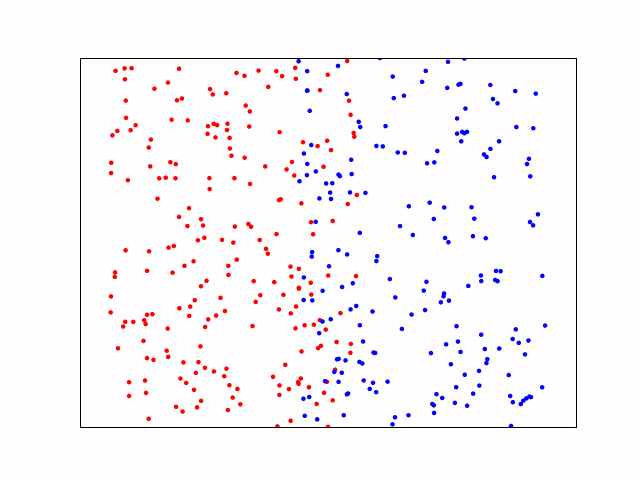

In [4]:
func = partial(animate, im=im, position=position, velocity=velocity, delta_time=delta_time, maxes=maxes, radius=radius)
ani = animation.FuncAnimation(fig, func, 20, interval=30, blit=True)

ani.save("animation.gif", writer=animation.PillowWriter(30))
plt.close()
Image(open("animation.gif", 'rb').read())